In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
df_co2 = pd.read_csv("datasets/co2.txt")
df_gdp = pd.read_excel("datasets/gdp.xls", skiprows=2, header=1, index_col=0)
df_work = pd.read_csv("datasets/occupation.csv")
df_population = pd.read_csv("datasets/population.csv", skiprows=2, header=1)

In [3]:
df_co2.columns

Index(['iso_code', 'country', 'year', 'co2', 'co2_growth_prct',
       'co2_growth_abs', 'consumption_co2', 'trade_co2', 'trade_co2_share',
       'co2_per_capita', 'consumption_co2_per_capita', 'share_global_co2',
       'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp',
       'consumption_co2_per_gdp', 'co2_per_unit_energy', 'cement_co2',
       'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita',
       'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp',
       'population', 'gdp'],
      dtype='object')

In [4]:
df_co2['gdp_per_capita'] = df_co2['gdp'] / df_co2['population']
# df_co2['energy_per_capita'] = df_co2['ener']

In [5]:
co2 = pd.pivot_table(df_co2, values="co2", index=['country'],columns=['year']).loc[:,"1960":"2016"]
co2_per_capita = pd.pivot_table(df_co2, values="co2_per_capita", index=['country'],columns=['year']).loc[:,"1960":"2016"]
co2_per_gdp = pd.pivot_table(df_co2, values="co2_per_gdp", index=['country'],columns=['year']).loc[:,"1960":"2016"]
ghg_per_capita = pd.pivot_table(df_co2, values="ghg_per_capita", index=['country'],columns=['year']).loc[:,"1960":"2016"]
gdp_per_capita = pd.pivot_table(df_co2, values="gdp_per_capita", index=['country'],columns=['year']).loc[:,"1960":"2016"]
energy_per_capita = pd.pivot_table(df_co2, values="energy_per_capita", index=['country'],columns=['year']).loc[:,"1960":"2016"]
energy_per_gdp = pd.pivot_table(df_co2, values="energy_per_gdp", index=['country'],columns=['year']).loc[:,"1960":"2016"]



# CO2 vs GDP : Developed vs Developing

In [6]:
developed = ['United States', 'United Kingdom', 'Germany', 'Norway', 'Singapore', 'Canada']
developing = ['India', 'China', 'Brazil', 'Nigeria', 'Mexico', 'Russia']

In [7]:
def plot_co2_gdp(countries):
    fig, ax = plt.subplots(2,3, figsize=(20,10))
    
    for i,country in enumerate(countries):
        
        my_co2 = co2_per_capita.loc[country]
        my_gdp = gdp_per_capita.loc[country,"1960":"2016"]
        x = np.arange(1960,2017)
        
        color = 'tab:red'
        ax1 = ax[i//3, i%3]
        ax1.set_xlabel('Year')
        ax1.set_ylabel('GDP per Capita', color=color)
        ax1.plot(x,list(my_gdp), color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('CO2 per Capita', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,list(my_co2), color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.title(country)


        fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

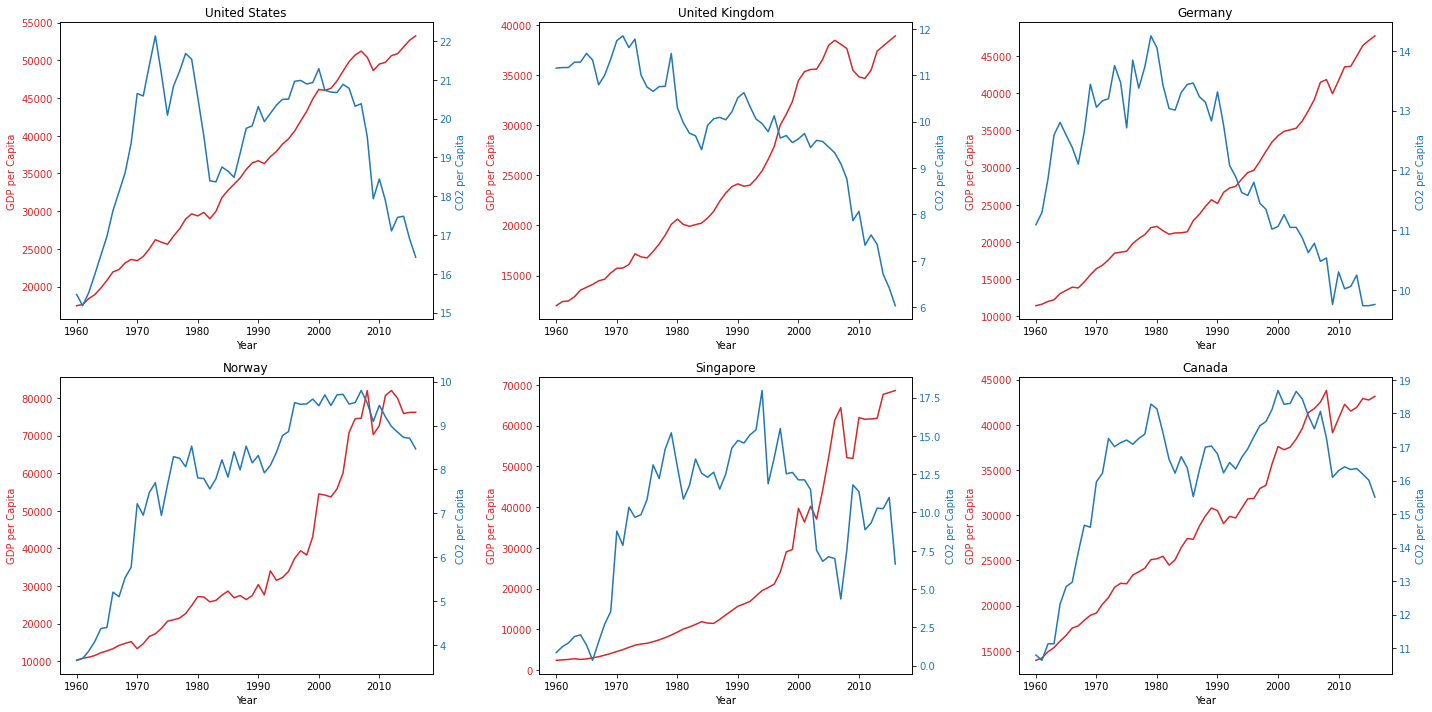

In [8]:
plot_co2_gdp(developed)

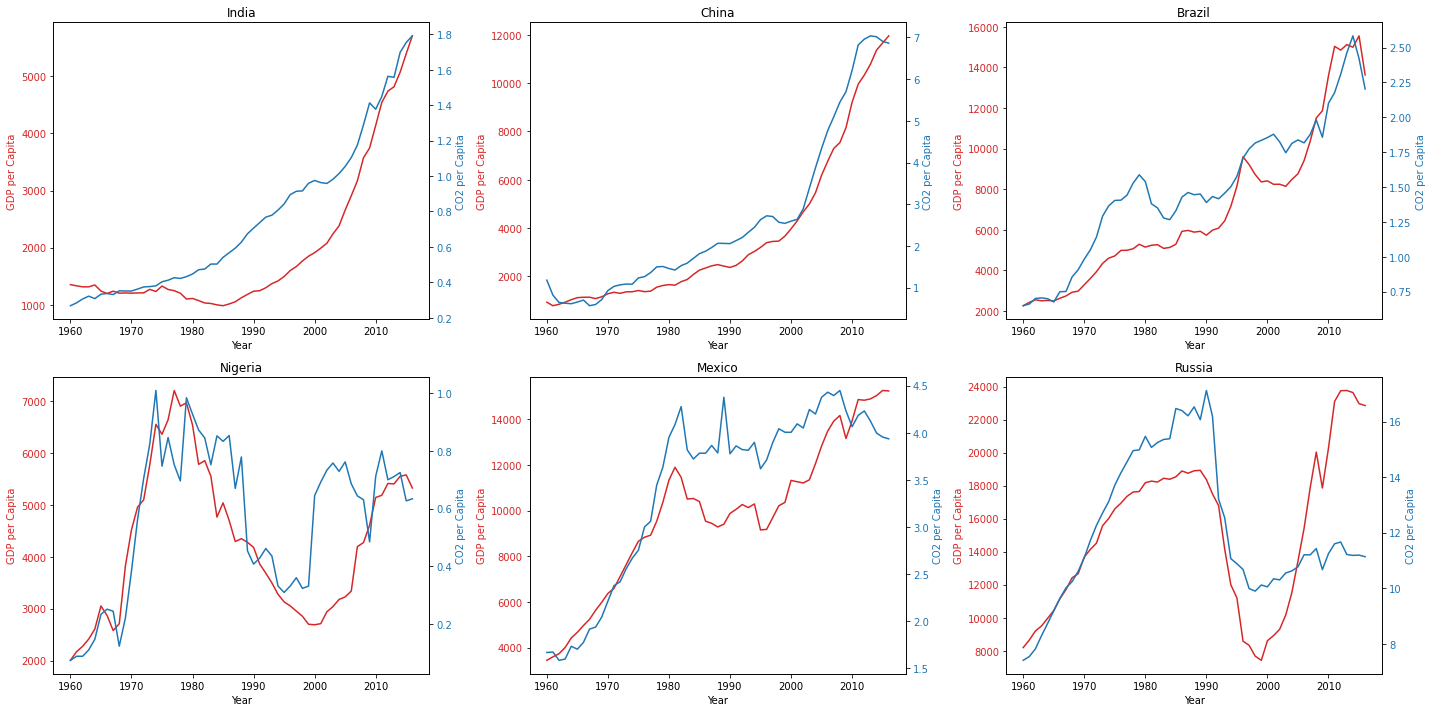

In [9]:
plot_co2_gdp(developing)

# Energy vs GDP

In [10]:
def plot_energy_gdp(countries):
    fig, ax = plt.subplots(2,3, figsize=(20,10))
    
    for i,country in enumerate(countries):
        
        my_co2 = energy_per_capita.loc[country]
        my_gdp = gdp_per_capita.loc[country,"1960":"2016"]
        x = np.arange(1960,2017)
        
        color = 'tab:red'
        ax1 = ax[i//3, i%3]
        ax1.set_xlabel('Year')
        ax1.set_ylabel('GDP per Capita', color=color)
        ax1.plot(x,list(my_gdp), color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('CO2 per Capita', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,list(my_co2), color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.title(country)


        fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

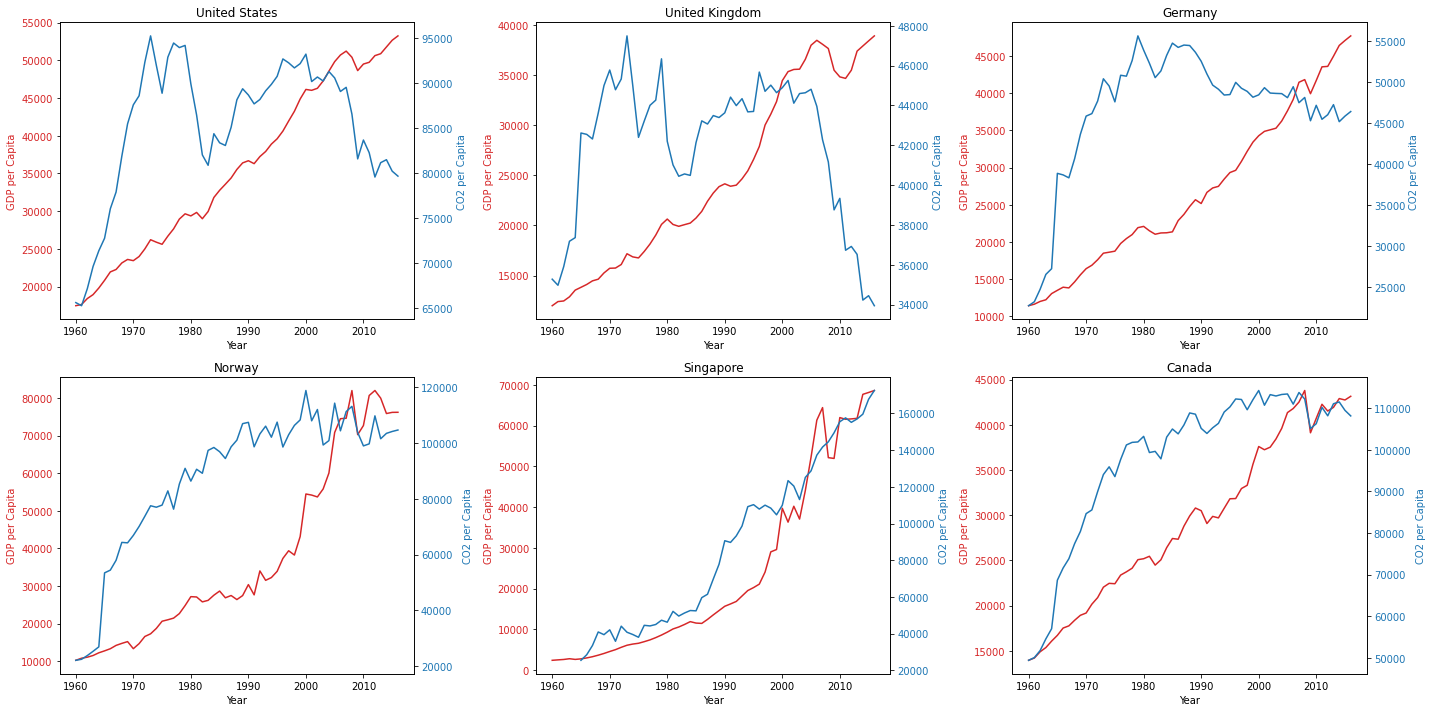

In [11]:
plot_energy_gdp(developed)

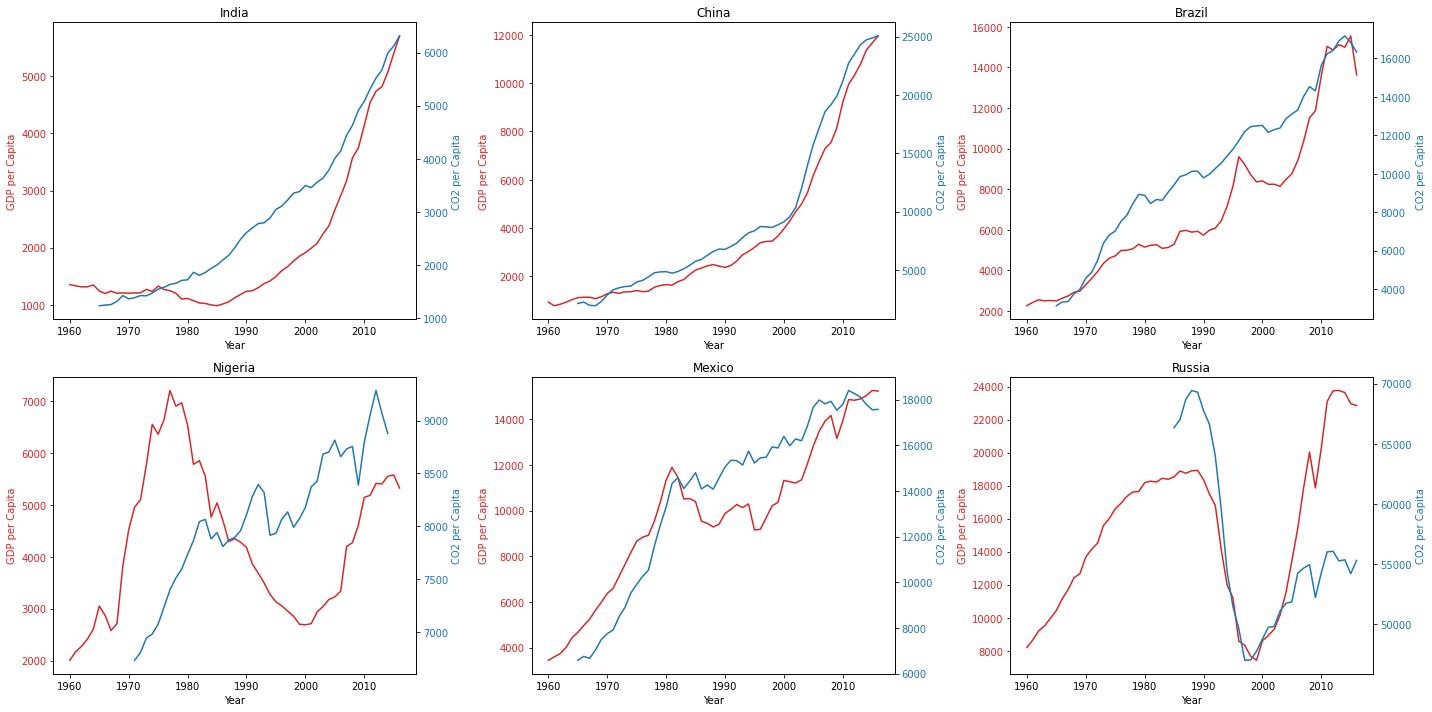

In [12]:
plot_energy_gdp(developing)

# Energy per GDP (not useful)

In [13]:
print(energy_per_gdp.loc[developing,2015])
print(energy_per_gdp.loc[developed,2015])

country
India      1.135
China      2.134
Brazil     1.082
Nigeria      NaN
Mexico     1.150
Russia     2.359
Name: 2015, dtype: float64
country
United States     1.523
United Kingdom    0.897
Germany           0.974
Norway            1.367
Singapore         2.461
Canada            2.560
Name: 2015, dtype: float64


<AxesSubplot:xlabel='country'>

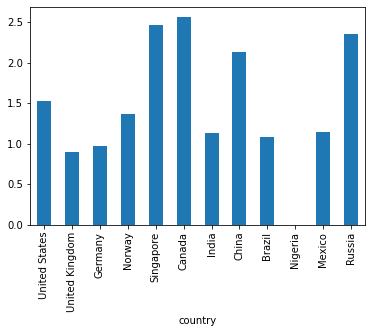

In [14]:
tmp = energy_per_gdp.loc[developed+developing,2015]
tmp.plot(kind='bar')

# Work

In [273]:
df_work = pd.read_csv("datasets/occupation.csv")

In [275]:
# df_work

In [276]:
# preprocess
df_work.rename(columns = {'Country or Area':'Country'}, inplace=True)
df_work = df_work[df_work['Year'].str.len()<5]
df_work['Year'] = df_work['Year'].astype(int,copy=False)
df_work['Year'].unique()

array([2011, 2001, 2010, 2000, 2016, 2006, 2009, 1999, 2013, 2012, 2008,
       1998, 2002, 2017, 2007, 2014, 1995, 2015, 2005, 2003, 2004, 1996])

In [278]:
for country in df_work['Country'].unique():
    most_recent_year = df_work[df_work['Country']==country]['Year'].max()

    index_to_remove = df_work[ (df_work['Year']!=most_recent_year) & (df_work["Country"]==country)].index
    df_work.drop(index_to_remove, inplace = True)
    

In [279]:
df_work_pivot = pd.pivot_table(df_work, values="Value", index=['Country'],columns=['Occupation'])
# df_work_pivot

In [280]:
df_work_pivot = df_work_pivot.fillna(0)

In [281]:
col1 = 'Administrative and Managerial Workers (ISCO 68 - 2)'
col2 = 'Administrative, Executive and Managerial Workers (ISCO 58 - 1)'
df_work_pivot['Admin'] = df_work_pivot[col1] + df_work_pivot[col2]
df_work_pivot.drop(columns=[col1,col2], inplace=True)

col1 = 'Armed forces (ISCO 88 - 0)'
col2 = 'Armed forces occupations (ISCO 08 - 0)'
col3 = 'Members of the Armed Forces (ISCO 58 - Y)'
col4 = 'Members of the Armed Forces (ISCO 68 - Y)'
df_work_pivot['Armed forces'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3] + df_work_pivot[col4]
df_work_pivot.drop(columns=[col1,col2,col3,col4], inplace=True)

col1 = 'Clerical Workers (ISCO 58 - 2)'
col2 = 'Clerical and Related Workers (ISCO 68 - 3)'
col3 = 'Clerical support workers (ISCO 08 - 4)'
col4 = 'Clerks (ISCO 88 - 4)'
df_work_pivot['Clerk'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3] + df_work_pivot[col4]
df_work_pivot.drop(columns=[col1,col2,col3,col4], inplace=True)

col1 = 'Craft and related trades workers (ISCO 08 - 7)'
col2 = 'Craft and related trades workers (ISCO 88 - 7)'
col3 = 'Craftsmen, Production-Process Workers, and Labourers Not Elsewhere Classified (ISCO 58 - 7/8)'
df_work_pivot['Craft'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3]
df_work_pivot.drop(columns=[col1,col2,col3], inplace=True)

col1 = 'Elementary occupations (ISCO 08 - 9)'
col2 = 'Elementary occupations (ISCO 88 - 9)'
df_work_pivot['Elementary occupations'] = df_work_pivot[col1] + df_work_pivot[col2]
df_work_pivot.drop(columns=[col1,col2], inplace=True)

col1 = 'Plant and machine operators and assemblers (ISCO 88 - 8)'
col2 = 'Plant and machine operators, and assemblers (ISCO 08 - 8)'
df_work_pivot['Plant and machine operators'] = df_work_pivot[col1] + df_work_pivot[col2]
df_work_pivot.drop(columns=[col1,col2], inplace=True)

col1 = 'Professional, Technical and Related Workers (ISCO 58 - 0)'
col2 = 'Professional, Technical and Related Workers (ISCO 68 - 0/1)'
col3 = 'Professionals (ISCO 08 - 2)'
col4 = 'Professionals (ISCO 88 - 2)'
col5 = 'Technicians and associate professionals (ISCO 08 - 3)'
col6 = 'Technicians and associate professionals (ISCO 88 - 3)'
df_work_pivot['Professionals'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3] + \
        df_work_pivot[col4] + df_work_pivot[col5] + df_work_pivot[col6]
df_work_pivot.drop(columns=[col1,col2,col3,col4,col5,col6], inplace=True)

col1 = 'Sales Workers (ISCO 58 - 3)'
col2 = 'Sales Workers (ISCO 68 - 4)'
col3 = 'Service Workers (ISCO 68 - 5)'
col4 = 'Service and sales workers (ISCO 08 - 5)'
col5 = 'Service workers and shop and market sales workers (ISCO 88 - 5)'
df_work_pivot['Sales and service'] = df_work_pivot[col1] + df_work_pivot[col2] + \
                            df_work_pivot[col3] + df_work_pivot[col4] + df_work_pivot[col5]
df_work_pivot.drop(columns=[col1,col2,col3,col4,col5], inplace=True)

col1 = 'Skilled agricultural and fishery workers (ISCO 88 - 6)'
col2 = 'Skilled agricultural, forestry and fishery workers (ISCO 08 - 6)'
df_work_pivot['Agriculture'] = df_work_pivot[col1] + df_work_pivot[col2]
df_work_pivot.drop(columns=[col1,col2], inplace=True)

col1 = 'Total (ISCO 08)'
col2 = 'Total (ISCO 58)'
col3 = 'Total (ISCO 68)'
col4 = 'Total (ISCO 88)'
df_work_pivot['Total'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3] + df_work_pivot[col4]
df_work_pivot.drop(columns=[col1,col2,col3,col4], inplace=True)

In [282]:
df_work_pivot.columns

Index(['Agricultural, Animal Husbandry and Forestry Workers, Fishermen and Hunters (ISCO 68 - 6)',
       'Farmers, Fishermen, Hunters, Loggers and Related Workers (ISCO 58 - 4)',
       'Legislators, senior officials and managers (ISCO 88 - 1)',
       'Managers (ISCO 08 - 1)',
       'Miners, Quarrymen and Related Workers (ISCO 58 - 5)',
       'Production and Related Workers, Transport Equipment Operators and Labourers (ISCO 68 - 7/8/9)',
       'Service, Sport and Recreation Workers (ISCO 58 - 9)', 'Unknown',
       'Workers Not Classifiable by Occupation (ISCO 68 - X)',
       'Workers in Transport and Communication Occupations (ISCO 58 - 6)',
       'Admin', 'Armed forces', 'Clerk', 'Craft', 'Elementary occupations',
       'Plant and machine operators', 'Professionals', 'Sales and service',
       'Agriculture', 'Total'],
      dtype='object', name='Occupation')

In [283]:
data_work = df_work_pivot.merge(gdp_per_capita[[2015]], how='inner', left_index=True, right_on="country")

In [284]:
total = len(data_work)

In [287]:
# remove columns with lots of missing values
remove_these = []
for col in data_work.columns:
    if len(data_work[data_work[col]>0]) < 0.7 * total:
        remove_these.append(col)
print(remove_these)
data_work.drop(columns=remove_these, inplace=True)

['Agricultural, Animal Husbandry and Forestry Workers, Fishermen and Hunters (ISCO 68 - 6)', 'Farmers, Fishermen, Hunters, Loggers and Related Workers (ISCO 58 - 4)', 'Legislators, senior officials and managers (ISCO 88 - 1)', 'Managers (ISCO 08 - 1)', 'Miners, Quarrymen and Related Workers (ISCO 58 - 5)', 'Production and Related Workers, Transport Equipment Operators and Labourers (ISCO 68 - 7/8/9)', 'Service, Sport and Recreation Workers (ISCO 58 - 9)', 'Unknown', 'Workers Not Classifiable by Occupation (ISCO 68 - X)', 'Workers in Transport and Communication Occupations (ISCO 58 - 6)', 'Admin', 'Armed forces']


In [288]:
data_work.columns

Index([                      'Clerk',                       'Craft',
            'Elementary occupations', 'Plant and machine operators',
                     'Professionals',           'Sales and service',
                       'Agriculture',                       'Total',
                                2015],
      dtype='object')

In [289]:
data_work.iloc[:,:7] = data_work.iloc[:,:7].div(data_work.Total, axis=0)

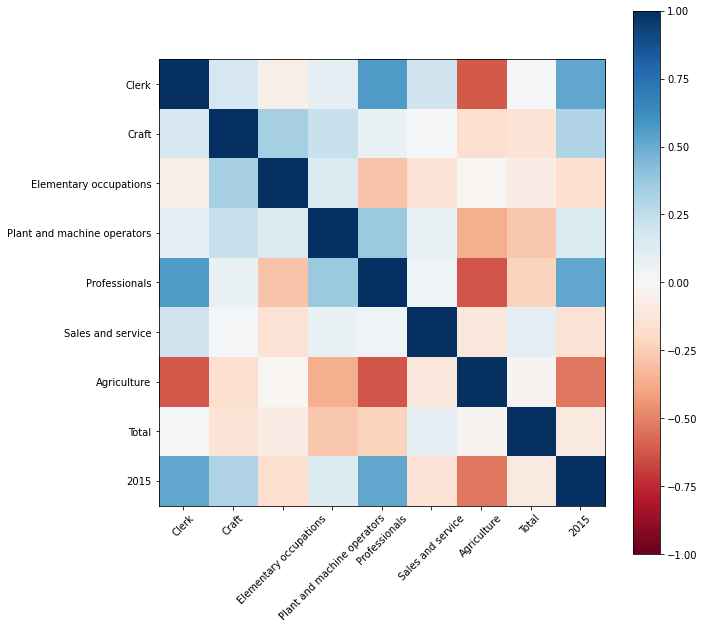

In [290]:
corr_matrix= data_work.corr()

fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(10, 10)

labels = data_work.select_dtypes(include=np.number).columns.tolist()

myimage = axes_cor.imshow(corr_matrix, cmap="RdBu", vmin=-1)
# plt.pcolor()
plt.colorbar(myimage)

axes_cor.set_xticks(np.arange(0,corr_matrix.shape[0], corr_matrix.shape[0]*1.0/len(labels)))
axes_cor.set_yticks(np.arange(0,corr_matrix.shape[1], corr_matrix.shape[1]*1.0/len(labels)))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)

plt.xticks(rotation=45)
plt.draw()

In [291]:
y = data_work[2015]
X = data_work.drop(columns=[2015])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print("num of training samples = ", len(X_train))
print("num of test samples = ", len(X_test))

In [316]:
def accuracy(y_true, y_pred, thresh=100):
    return np.sum(np.where(abs(y_true-y_pred)<thresh, 1, 0)) / len(y_true)


In [317]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [318]:
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))


220585837.54494125
129087326.13099693


In [319]:
thresh = 5000
print("train accuracy with threshold =", thresh, " : ", accuracy(y_train, y_pred_train, thresh))
print("train accuracy with threshold =", thresh, " : ", accuracy(y_test, y_pred_test, 5000))

train accuracy with threshold = 5000  :  0.34615384615384615
train accuracy with threshold = 5000  :  0.46153846153846156


# Kaggle Countries Dataset : GDP prediction


https://www.kaggle.com/fernandol/countries-of-the-world

In [323]:
df = pd.read_csv("datasets/kaggle_countries.csv")

In [324]:
df['Region'] = df['Region'].str.strip()
df.drop(columns=['Country'], inplace=True)

In [325]:
categorical_variables = ['Region','Climate']

In [326]:
# print(df.isnull().sum())
# print(df.columns)

In [327]:

null_cols = ['Net migration', 'Infant mortality (per 1000 births)','GDP ($ per capita)', 
             'Literacy (%)', 'Phones (per 1000)', 'Arable (%)','Crops (%)', 'Other (%)', 
             'Climate', 'Birthrate', 'Deathrate','Agriculture', 'Industry', 'Service']

In [328]:
def preprocess_cols(col):
    if df[col].dtypes not in ('int64','float64'):
        df[col] = df[col].str.replace(',','.').astype(float)

def replace_null_with_region_mean(col):
    if df[col].dtypes not in ('int64','float64'):
        df[col] = df[col].str.replace(',','.').astype(float)
    region_mean = dict(df.groupby('Region')[col].mean())
    for region in region_mean:
        df[col].loc[(df['Region']==region) & (df[col].isnull())] = region_mean[region]

In [329]:


for col in df.columns:
    if col not in categorical_variables:
        preprocess_cols(col)

for col in null_cols:
    if col not in categorical_variables:
        replace_null_with_region_mean(col)
        
        
df = pd.get_dummies(df, columns=categorical_variables)

/Users/patel/opt/anaconda3/envs/ece143/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [330]:
y = df['GDP ($ per capita)']
X = df.drop(columns=['GDP ($ per capita)'])

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [332]:
X_train.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
Region_ASIA (EX. NEAR EAST)             uint8
Region_BALTICS                          uint8
Region_C.W. OF IND. STATES              uint8
Region_EASTERN EUROPE                   uint8
Region_LATIN AMER. & CARIB              uint8
Region_NEAR EAST                  

In [333]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [334]:
def accuracy(y_true, y_pred, thresh=100):
    return np.sum(np.where(abs(y_true-y_pred)<thresh, 1, 0)) / len(y_true)

In [335]:
thresh = 2000
print("train error:", mean_squared_error(y_train, y_pred_train))
print("test error:", mean_squared_error(y_test, y_pred_test))

print("train accuracy with thresh=",thresh," =", accuracy(y_train, y_pred_train, thresh))
print("test accuracy with thresh=",thresh," =", accuracy(y_test, y_pred_test, thresh))

train error: 19020651.803467892
test error: 25755327.448973402
train accuracy with thresh= 2000  = 0.4696132596685083
test accuracy with thresh= 2000  = 0.4782608695652174


In [336]:
y_train

98     29600.0
1       4500.0
2       6000.0
59      3300.0
55      1300.0
        ...   
113     1700.0
64     12300.0
15     16900.0
125      600.0
9       3500.0
Name: GDP ($ per capita), Length: 181, dtype: float64